In [34]:
import pandas as pd
from unidecode import unidecode

## Peso y volumen de los libros

In [35]:
libros = pd.read_csv('../data/raw/PesoVolumenLibros.csv', encoding='latin1')

In [36]:
libros

,libro_titulo,libro_isbn,ancho_cm,alto_cm,grosor_cm,paginas,vol_cm3_1libro,vol_m3_500libros,peso_g_1libro,peso_t_500libros
0,Niebla de sueño,978-84-1353-114-4,13,19,1.2,162,296.4,0.14820,250,0.125
1,La isla de los canarios. Volumen 6,978-84-1353-115-1,21,23,0.8,92,386.4,0.19320,400,0.200
2,El mundo del libro en Canarias,84-8103-396-0,15,21,3.1,532,976.5,0.48825,780,0.390
3,Historia del Cabildo insular de Gran Canaria,84-8103-067-8,17,24,3.9,748,1591.2,0.79560,1240,0.620
4,Flora de Gran Canaria 1,978-84-8103-741,27,34,3.0,238,2754.0,1.37700,2280,1.140


## Total distance

**Ruta**. Camino (a ser) tomado para llegar de un punto de partida a un punto de destino. (AENOR2013)

**Trayecto**. Para un servicio de transporte de mercancías o de pasajeros, la sección de la ruta tomada o que se ha de tomar, dentro de la cual el vehículo transporta las mercancías o el pasajero (AENOR2013).

In [37]:
city_port_distance = pd.read_csv('../data/final/city_port_distance.csv')
city_port_distance.drop(columns=['Unnamed: 0', 'id'], inplace=True)

port_portlp_distance = pd.read_csv('../data/final/port_portlp_distance.csv')
port_portlp_distance.drop(columns='Unnamed: 0', inplace=True)

with open('../data/final/portlp_final_distance_km.txt') as f:
    portlp_final_distance = f.readlines()
portlp_final_distance = float(portlp_final_distance[0])

If Las Palmas Port is the closest the trip will be removed from this calculation as it will be done at a later stage.

In [38]:
city_port_distancelp = city_port_distance[city_port_distance['port_name']=='LAS PALMAS']

city_port_distance = city_port_distance[city_port_distance['port_name'] !='LAS PALMAS']

In [39]:
display(city_port_distance.head(5))
display(city_port_distancelp.head(5))
display(port_portlp_distance.head(5))
display(portlp_final_distance)

,name,population,lat,lon,latlon,port_name,port_latlon,shortest_distance_to_port_km
0,FUENGIROLA,71482,36.53998,-4.62473,"36.53998,-4.62473",ALGECIRAS,"36.13672,-5.434271",254.677
1,CALVIA,51774,39.56570,2.50621,"39.5657,2.50621",VALENCIA,"39.44231,-0.316466",284.566
2,ARONA,78614,28.09962,-16.68102,"28.09962,-16.68102",LA GOMERA,"28.0655,-17.1175",56.399
3,PONTEVEDRA,81576,42.43100,-8.64435,"42.431,-8.64435",BILBAO,"43.3558,-3.066499",631.209
4,GIRONA,96188,41.98311,2.82493,"41.98311,2.82493",BARCELONA,"41.35238,2.158441",110.221


,name,population,lat,lon,latlon,port_name,port_latlon,shortest_distance_to_port_km
117,SAN BARTOLOME DE TIRAJANA,52161,27.92481,-15.57329,"27.92481,-15.57329",LAS PALMAS,"28.141,-15.41635",64.859
124,LAS PALMAS DE GRAN CANARIA,381847,28.09973,-15.41343,"28.09973,-15.41343",LAS PALMAS,"28.141,-15.41635",10.411
132,SANTA LUCIA,63637,27.91174,-15.54071,"27.91174,-15.54071",LAS PALMAS,"28.141,-15.41635",57.685
173,TELDE,100015,27.99243,-15.41915,"27.99243,-15.41915",LAS PALMAS,"28.141,-15.41635",24.596


,origin,distanceLP_nm,distanceLP_km
0,A CORUNA,1001,1853.852
1,ALGECIRAS,702,1300.104
2,ALICANTE,997,1846.444
3,ALMERIA,848,1570.496
4,AVILES,1098,2033.496


13.961

## Footprint transport to port by road

EN 16258 Distance-based approach.
- 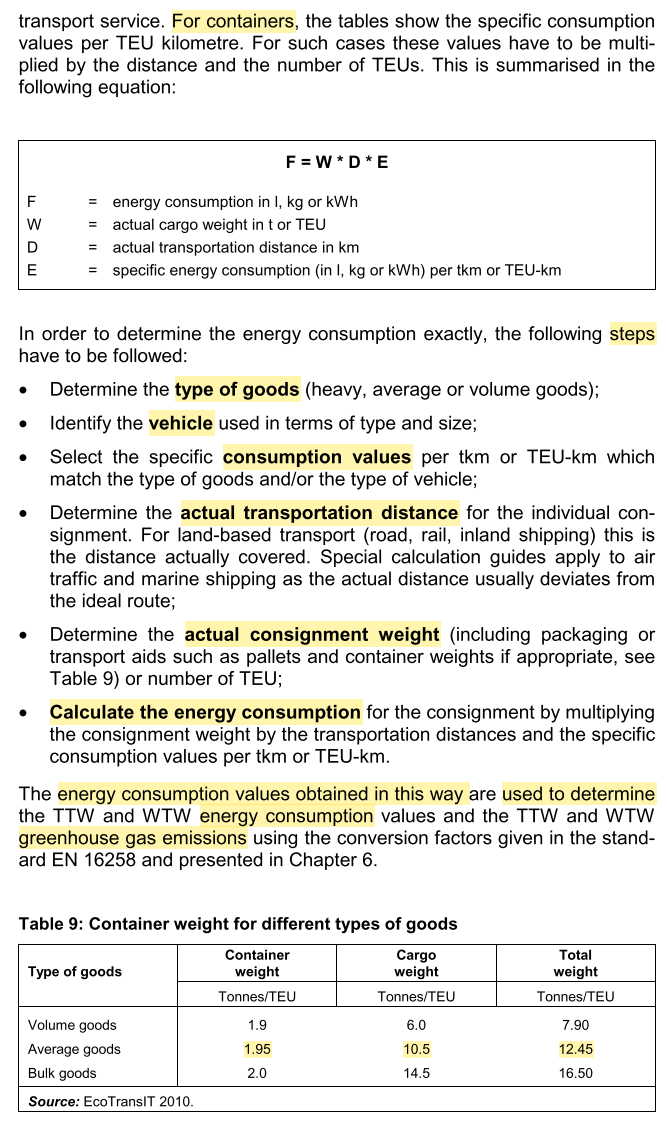

### Suposiciones sobre el transporte

**(Las que tomé en base a EcoTranIT World)**

Truck/Lorry (defaults)
-	Vehicle type: 12-20 t (config) Creo que lo he configurado al ponerlo en RoRo.
    - Lorry type (load capacity) (c. methodology report ch. 6.1.1)
	- Default: 26-40t
-	Fuel type: diesel (default)
	- Sets the fuel type for trucks. Diesel is the default fuel type. Alternative fuel types include CNG (compressed natural gas), LNG (liquefied natural gas), LNG-diesel (a dual-fuel engine with an average ratio of 40% diesel and 60% LNG in energy consumption) and BEV (battery electric vehicle). Note: Alternative fuel types require dedicated refuelling facilities. The availability is restricted and may differ by region.
-	Emission standard: EURO 5 (default)
	- Sets the emission standard for the selected lorry type. Standard values vary per region (EURO for Europe and other countries, EPA for the US and Canada and JP for Japan). (c. methodology report ch. 6.1.3)
-	Load factor: 60% (default)
	- The load factor determines how much of the load capacity of the selected transport vehicle is utilised. The load factor is 100% if the maximum load weight capacity of the vehicle or the load carrier (e.g. container) is used. (c. methodology report ch.)
-	ETF: 20% (default)
	- Additional distance that the vehicle or load carrier has to travel empty related to the transport distance. The share of empty trips varies depending on the selected transport mode and cargo type. (c. methodology report ch. 4.2.3).
-	Cooling Unit: No


**(Otras suposiciones)**
- Medio de transporte (tipo de camión). EcoTransITWorld2023, pg. 60 indica que en EU 28 (without SE) el transporte por defecto es Truck > 26-40t. Yo voy a tomar un camión de 12-20 tonnes.
- Combustible. Diesel. No biofuel.
- Capacidad de carga de los camiones y factores de corrección carreteras urbanas:
    - ![image-6.png](attachment:image-6.png)
- Specific energy consumption. Consumo energético específico.
    - (Schmied2012)
        - 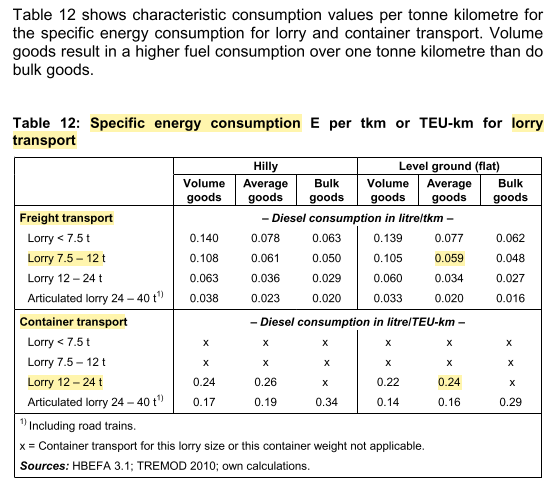
    - (EcoTransITWorld2023, pg. 63)
        - 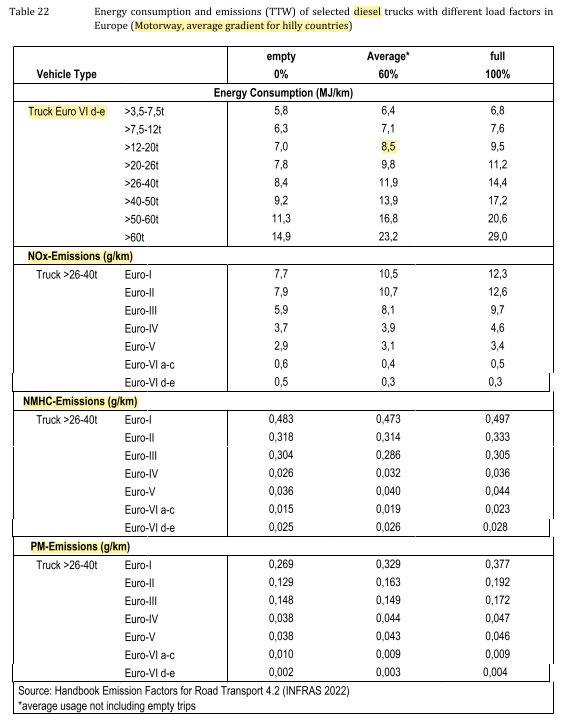
    
    

#### Subetapa 2.1: establecimiento del sitema de operación de un vehículo (VOS) relativo a este trayecto

A 12-24 t lorry transports a container (1 TEU) with average goods por autopistas (terreno plano). El contenedor puede llevar como máximo 16.1 toneladas, pero está cargado al 60%. El contenedor medio pesa 1.95 toneladas (ver imagen arriba).

**Factor de carga**. Ratio obtenido por la relación entre la carga real y la carga máxima autorizada de un medio de transporte. (AENOR2013)

In [60]:
peso_max = 16.1
factor_carga = 0.6
peso_contenedor = 1.95
peso_total = (peso_max * factor_carga) + peso_contenedor  # actual cargo weight
print(peso_total)

11.61


#### Subetapa 2.2: cuantificación del consumo total de combustible para el VOS

La distancia a cubrir es de Fuengirola (36.53998,-4.62473) al puerto de Algeciras (36.13672,-5.434271) es de 254.677 km.

In [64]:
distance = 254.677  # km
specific_energy_consumption = 0.24 # l/tkm

diesel_l = peso_total * distance * specific_energy_consumption
# (litros de diesel)

print(diesel_l)

709.6319927999999


#### Subetapa 2.3: cálculo del consumo total de energía y de emisiones de GEI para este VOS

VOS - Sistema de Operación de un Vehículo. Conjunto de operaciones de un vehículo.

Cálculos deben generar los siguientes resultados:

Well-to-Wheel (WTW) = Well-to-Tank (WTT) + Tank-to-Wheel (TTW)
- WTW. Fuente a  ruedas. Evaluación relativa al vehículo (funcionamiento del motor o motores que tiene) y a los procesos energéticos. Consumo de energía y emisiones de fuente a ruedas (Ew, Gw).
- WTT. Fuente a depósito. Evaluación relativa a los procesos energéticos.
- TTW. Depósito a ruedas. Consumo de energía y emisiones de depósito a ruedas (Et, Gt).

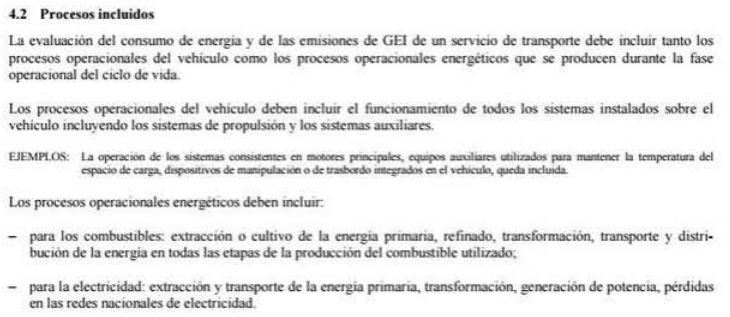

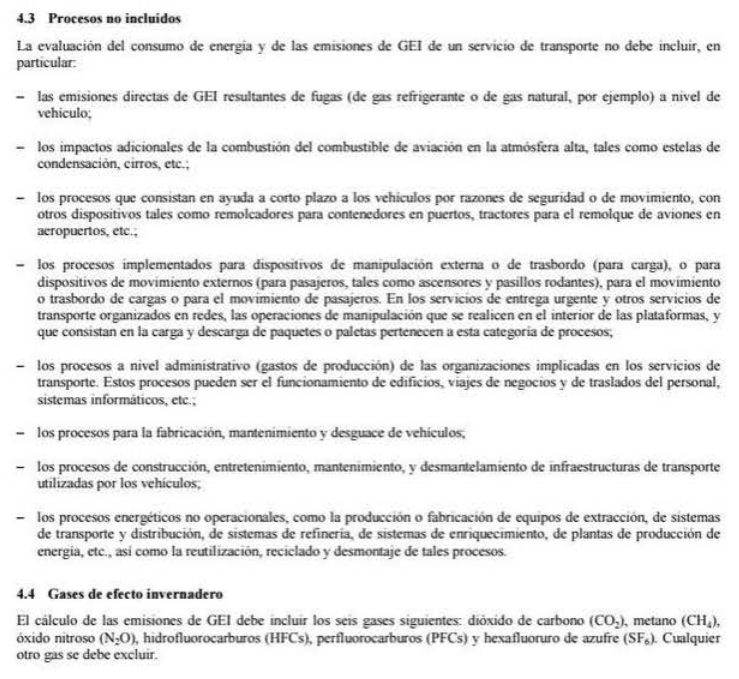


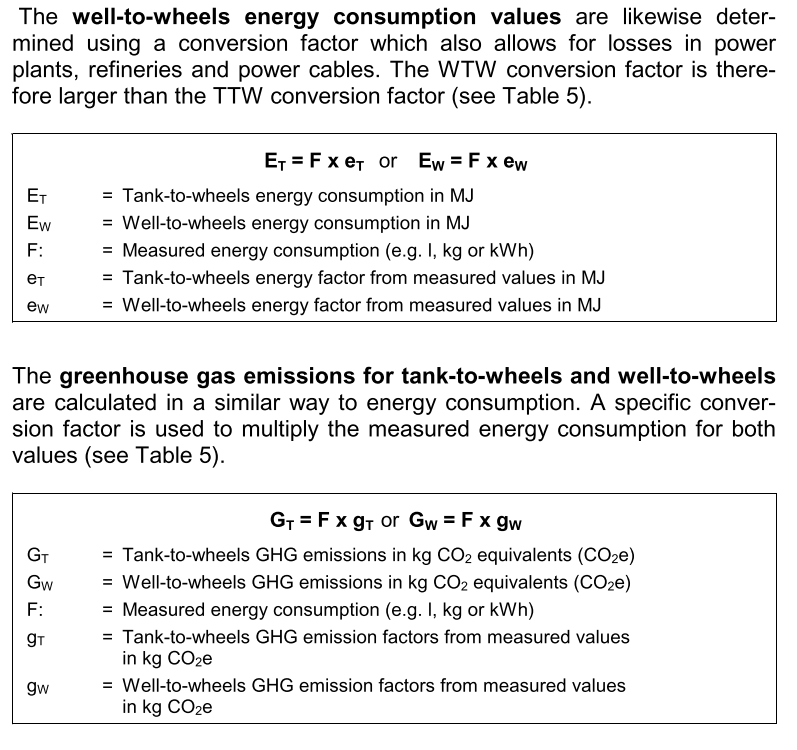


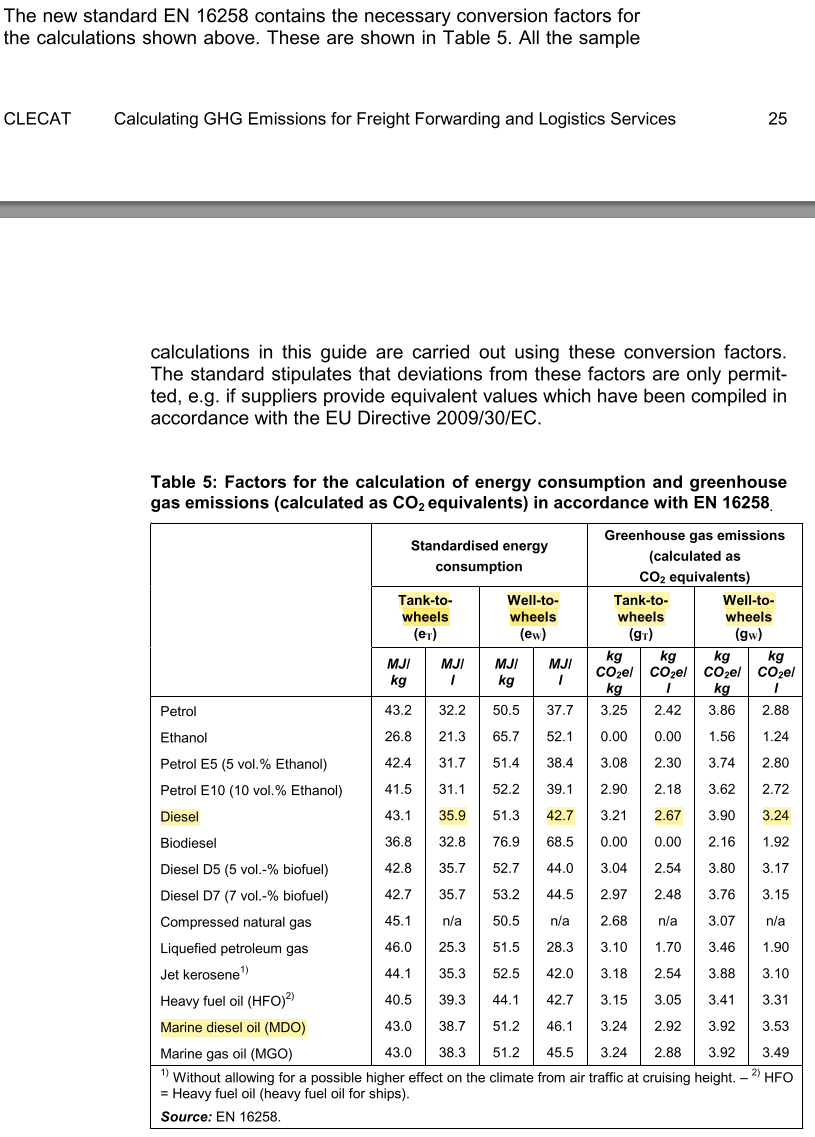

In [72]:
# Calculate MJ
factor_diesel_ttw_mjl = 35.9
factor_diesel_wtw_mjl = 42.7

energy_libros_ttw_mj = diesel_libros_l * factor_diesel_ttw_mjl
energy_libros_wtw_mj = diesel_libros_l * factor_diesel_wtw_mjl

print(energy_libros_ttw_mj)
print(energy_libros_wtw_mj)

274.287129
326.241237


In [75]:
# Calculate GHG emissions (CO2 eq)
factor_diesel_ttw_co2 = 2.67
factor_diesel_wtw_co2 = 3.24

energy_libros_ttw_co2 = diesel_libros_l * factor_diesel_ttw_co2
energy_libros_wtw_co2 = diesel_libros_l * factor_diesel_wtw_co2
energy_libros_wtt_co2 = energy_libros_wtw_co2 - energy_libros_ttw_co2

print('TTW', energy_libros_ttw_co2)
print('WTW2', energy_libros_wtw_co2)
print('WTT', energy_libros_wtt_co2)


TTW 20.399627699999996
WTW2 24.7546044
WTT 4.354976700000005


Incluir empty trips (20%)

#### Subetapa 2.4: asignación de este trayecto a una porción de cada uno de los cuatro resultados de la Subetapa 2.3

Alocar 0.125 toneladas. Share of diesel consumption per t cargo.

In [67]:
peso_libros_t = 0.125 

diesel_libros_l = (peso_libros_t/peso_total)*diesel_l

print(diesel_libros_l)

7.6403099999999995


In [68]:
# Hecho con otro approach

specific_energy_consumption = 8.5  # 60%, diesel, TTW, E consumption per net tonne km
fuengirola = 119  # 254.677
toneladas = 0.125

energy_consumption_mj = specific_energy_consumption * fuengirola * toneladas

print(energy_consumption_mj)

126.4375
